In [1]:
#Few example or approach to solve the problems
#1:

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


In [3]:
#1 Get ready data for transform
train_dataset=datasets.FashionMNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)
test_dataset=datasets.FashionMNIST(root='./data',train=False,transform=transforms.ToTensor(),download=True)

100%|██████████| 26.4M/26.4M [00:02<00:00, 10.6MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 176kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.12MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 6.39MB/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [4]:
train_dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
test_dataset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [6]:
#Make them batches
train_dataset_loader = DataLoader(train_dataset,batch_size=64,shuffle=True)
test_dataset_loader = DataLoader(test_dataset,batch_size=64,shuffle=True)

In [7]:
len(train_dataset_loader)

938

In [8]:
#build logistic Model
class LogisticRegressionModel(nn.Module):
    def __init__(self,in_dim,out_dim):
        super().__init__()
        self.linear = nn.Linear(in_dim,out_dim)

    def forward(self,x):
      res=self.linear(x)
      return res


In [9]:
model = LogisticRegressionModel(28*28,10)

In [10]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0004,  0.0084, -0.0261,  ..., -0.0020, -0.0030, -0.0286],
                      [ 0.0103, -0.0051, -0.0224,  ...,  0.0297,  0.0143, -0.0312],
                      [-0.0238, -0.0233, -0.0085,  ...,  0.0351, -0.0197,  0.0250],
                      ...,
                      [-0.0076, -0.0271,  0.0226,  ..., -0.0248,  0.0105,  0.0295],
                      [-0.0121,  0.0259,  0.0084,  ...,  0.0298,  0.0029, -0.0285],
                      [ 0.0345,  0.0194,  0.0023,  ..., -0.0089, -0.0181, -0.0061]])),
             ('linear.bias',
              tensor([ 0.0194,  0.0114,  0.0199,  0.0244, -0.0138, -0.0122, -0.0185, -0.0046,
                       0.0094,  0.0212]))])

In [11]:
model

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [12]:
device ="cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [22]:
#Now loss function and optimizer
model = model.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

In [23]:
#Now build the model
epochs = 20

for i in range(epochs):
  print("***************")
  print(f"epochs",{epochs + 1})
  running_loss = 0.0
  running_acc = 0.0
  model.train()
  for i , data in enumerate(train_dataset_loader,1):
    image,label = data
    image = image.view(image.size(0),-1)
    image = image.to(device) #load on gpu
    label = label.to(device)
    res = model(image) #forward pass batch by batch
    loss = loss_fn(res,label)
    running_loss += loss.item()
    _,preds = torch.max(res,1)
    running_acc += (preds == label.data).float().mean()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() #update gradient

    if i % 300 == 0:
      print(f'[{i+1}/ {i}] loss: {running_loss/i:6f}, acc: {running_acc/i:6f}')
  print(f'[{i+1}/ {i}] loss: {running_loss/i:6f}, acc: {running_acc/i:6f}')


***************
epochs {21}
[301/ 300] loss: 0.365414, acc: 0.878438
[601/ 600] loss: 0.363463, acc: 0.876719
[901/ 900] loss: 0.363267, acc: 0.876163
[939/ 938] loss: 0.362825, acc: 0.876283
***************
epochs {21}
[301/ 300] loss: 0.352182, acc: 0.879010
[601/ 600] loss: 0.347884, acc: 0.879375
[901/ 900] loss: 0.353290, acc: 0.878090
[939/ 938] loss: 0.352668, acc: 0.878781
***************
epochs {21}
[301/ 300] loss: 0.360328, acc: 0.876563
[601/ 600] loss: 0.353271, acc: 0.878333
[901/ 900] loss: 0.351159, acc: 0.878924
[939/ 938] loss: 0.349800, acc: 0.879364
***************
epochs {21}
[301/ 300] loss: 0.358238, acc: 0.876146
[601/ 600] loss: 0.354467, acc: 0.877786
[901/ 900] loss: 0.349323, acc: 0.879306
[939/ 938] loss: 0.348053, acc: 0.879514
***************
epochs {21}
[301/ 300] loss: 0.336293, acc: 0.881823
[601/ 600] loss: 0.342181, acc: 0.880677
[901/ 900] loss: 0.346237, acc: 0.880069
[939/ 938] loss: 0.346543, acc: 0.880064
***************
epochs {21}
[301/ 300] l

In [24]:
len(test_dataset_loader)

157

In [25]:
#Now evaluate the Model

model.eval()
val_acc = 0.0
val_loss = 0.0
for data in test_dataset_loader:
  image,label = data
  image = image.view(image.size(0),-1)
  image = image.to(device)
  label = label.to(device)
  with torch.no_grad():

    res = model(image)
    loss = loss_fn(res,label)
  val_loss += loss.item()
  _,preds = torch.max(res,1) #to get the max value
  val_acc += (preds == label).float().mean()

  print(f'val_loss: {val_loss/len(test_dataset_loader):6f}, val_acc: {val_acc/len(test_dataset_loader):6f}')


val_loss: 0.003529, val_acc: 0.006071
val_loss: 0.006594, val_acc: 0.011246
val_loss: 0.010113, val_acc: 0.016222
val_loss: 0.011910, val_acc: 0.021994
val_loss: 0.014371, val_acc: 0.027369
val_loss: 0.017427, val_acc: 0.032942
val_loss: 0.024008, val_acc: 0.037719
val_loss: 0.026907, val_acc: 0.043292
val_loss: 0.028905, val_acc: 0.049064
val_loss: 0.031701, val_acc: 0.054339
val_loss: 0.034519, val_acc: 0.059713
val_loss: 0.036790, val_acc: 0.064988
val_loss: 0.039372, val_acc: 0.070263
val_loss: 0.042097, val_acc: 0.075537
val_loss: 0.044277, val_acc: 0.081111
val_loss: 0.046480, val_acc: 0.086584
val_loss: 0.050773, val_acc: 0.091361
val_loss: 0.052035, val_acc: 0.097233
val_loss: 0.056347, val_acc: 0.102408
val_loss: 0.058891, val_acc: 0.107683
val_loss: 0.062099, val_acc: 0.113157
val_loss: 0.065775, val_acc: 0.118531
val_loss: 0.068237, val_acc: 0.124104
val_loss: 0.072335, val_acc: 0.129379
val_loss: 0.076549, val_acc: 0.134455
val_loss: 0.079067, val_acc: 0.140127
val_loss: 0.

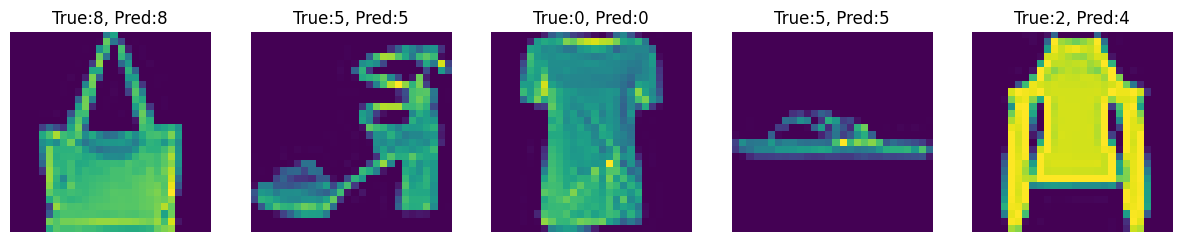

In [26]:
#visualization how the model is working
images,labels = next(iter(test_dataset_loader))
images = images.reshape(-1,28*28).to(device)
labels = labels.to(device)
outputs = model(images)
_,predicted = torch.max(outputs,1)
fig ,ax = plt.subplots(1,5,figsize=(15,3)) #1 row and 5 columns
for i in range(5):
    ax[i].imshow(images[i].cpu().detach().numpy().reshape(28,28))
    ax[i].set_title(f"True:{labels[i].item()}, Pred:{predicted[i].item()}")
    ax[i].axis("off")

plt.show()


In [27]:
#save the model
model.state_dict()
torch.save(model.state_dict(),"./model.pt")